In [131]:
#import for data visualisation and handling
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
#import for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [134]:
import warnings

warnings.filterwarnings('ignore')

In [135]:
#read CSV file
data = "C:/Users/User/Desktop/FYP/new/public.accounts.csv"

try:
    df = pd.read_csv(data, header=None)
except FileNotFoundError:
    print("File not found. Please check the file path.")

In [136]:
#set the first row as header
df.columns = df.iloc[0] 
df = df.drop(index=0)     

In [137]:
df.shape

(17, 8)

In [138]:
df.head()

,account_id,username,bot_boolean,status_id_favourite,status_id_bookmarks,created_date,favourites_per_day,bookmarks_per_day
1,113566298085078000,admin,0,NaN,0,NaN,0,0
2,113583374984205000,bigboss,0,NaN,0,NaN,0,0
3,113583418885953000,angus,0,NaN,0,NaN,0,0
4,113605870548460000,izzzahinn,0,NaN,0,6/12/2024,1,0
5,113605880808083000,anonymous,1,1.14393E+17,114393211558115000,24/4/2025,8,8


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 1 to 17
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   account_id           17 non-null     object
 1   username             17 non-null     object
 2   bot_boolean          17 non-null     object
 3   status_id_favourite  4 non-null      object
 4   status_id_bookmarks  17 non-null     object
 5   created_date         8 non-null      object
 6   favourites_per_day   17 non-null     object
 7   bookmarks_per_day    17 non-null     object
dtypes: object(8)
memory usage: 1.2+ KB


In [208]:
# Clean and prepare data
df_clean = df[['bot_boolean', 'favourites_per_day', 'bookmarks_per_day']].dropna()
X = df_clean[['favourites_per_day', 'bookmarks_per_day']]
y = df_clean['bot_boolean']

#split the data with ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [209]:
# Train the CART model
cart_model = DecisionTreeClassifier(random_state=0)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [215]:
# Predict and evaluate
y_pred = cart_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



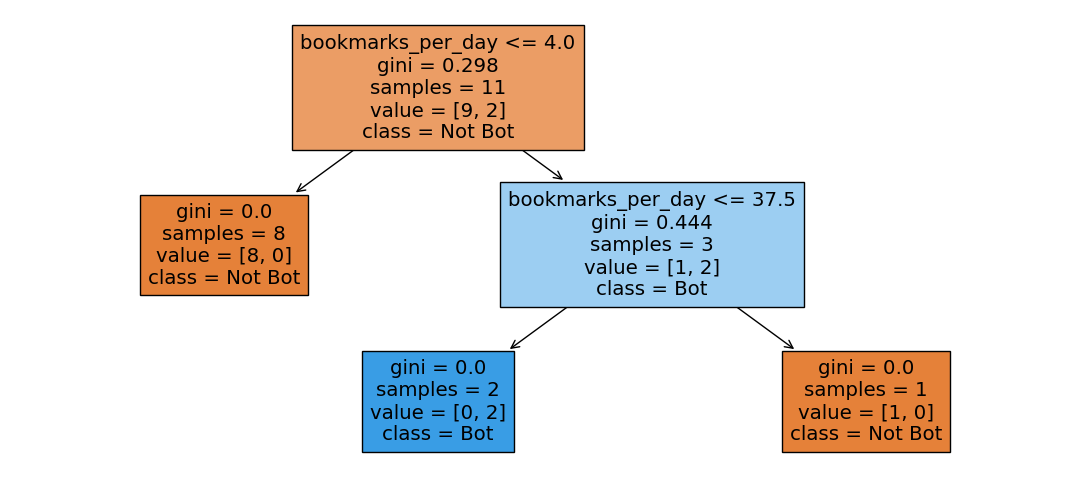

In [216]:
# Plot the decision tree
plt.figure(figsize=(11, 5))
plot_tree(cart_model, feature_names=X.columns, class_names=['Not Bot', 'Bot'], filled=True)
plt.tight_layout()
plt.show()

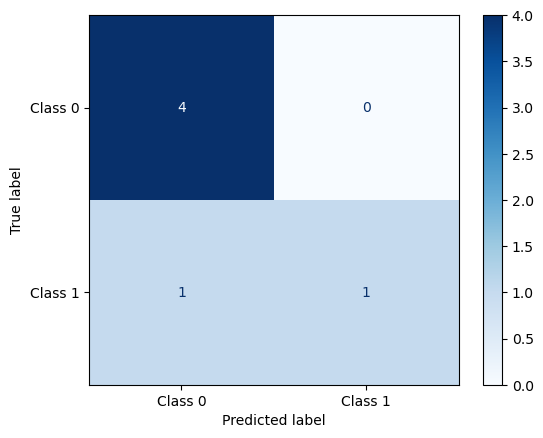

In [217]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])  # Adjust labels if needed

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # You can choose other colormaps if needed
plt.show()

In [214]:
print('Training set score: {:.4f}'.format(cart_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(cart_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8333
